In [371]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis

In [372]:
df = pd.read_excel(r'C:\Users\Abhin\OneDrive\Desktop\Machine Learning Projects\Email Spam\archive\combined_data - Excel.xlsx')

In [373]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103534 entries, 0 to 103533
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   103503 non-null  object
 1   text    93973 non-null   object
dtypes: object(2)
memory usage: 157.5 MB


In [374]:
df.head()
df.iloc[472:489]['label']

472                                                    0
473                                                    0
474                                                    0
475                                                    0
476                              to be in the industry .
477                                         that dynegy 
478    the houston business community may be hoping t...
479                                      but john olson 
480                                             already 
481    ( c ) copyright financial times ltd . all righ...
482                          http : / / www . ft . com .
483    copyright ? 2000 dow jones enron has more than 7 
484                                          for watson 
485     it accelerates our strategy some three or fou...
486                        this isn ' t the way ken lay 
487              this would not have been my dream case 
488    lay has been offered a seat on the combined co...
Name: label, dtype: object

In [375]:
df.dtypes

label    object
text     object
dtype: object

In [376]:
df['label'] = pd.to_numeric(df['label'], errors='coerce')           # there are some rows which contain some string so replace them with nan values

In [377]:
df.isna().sum()

label    20033
text      9561
dtype: int64

In [378]:
df.dropna(inplace=True)
df.isna().sum()

label    0
text     0
dtype: int64

In [379]:
df['label'] = df['label'].astype('int')

In [380]:
df['text'] = df['text'].astype('str')

In [381]:
np.where(df.duplicated() == True)

(array([39582, 81207], dtype=int64),)

In [382]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [383]:
df.duplicated().sum()

0

In [384]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,83453.0,0.624639,13.878802,0.0,0.0,1.0,1.0,2008.0


In [385]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83453 entries, 0 to 83452
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83453 non-null  int32 
 1   text    83453 non-null  object
dtypes: int32(1), object(1)
memory usage: 175.2 MB


In [386]:
df.tail()

,label,text
83448,0,hi given a date how do i get the last date of ...
83449,1,now you can order software on cd or download i...
83450,1,dear valued member canadianpharmacy provides a...
83451,0,subscribe change profile contact us long term ...
83452,1,get the most out of life ! viagra has helped m...


In [390]:
df = df[df['label'] <= 1]           
df.reset_index(drop=True)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83436,0,hi given a date how do i get the last date of ...
83437,1,now you can order software on cd or download i...
83438,1,dear valued member canadianpharmacy provides a...
83439,0,subscribe change profile contact us long term ...


In [391]:
df.iloc[10]['text']

'my dear fellow do you feel insecure about your penis size you need our new improved megadik penis enlargement pills please read on did you know megadik was featured in leading mens magazines such as fhm maxim plus many others and rated no escapenumber choice for penis enlargement Â» gain escapenumber inches in length Â» increase your penis width girth by upto escapenumber Â» produce stronger rock hard erections Â» escapenumber safe to take with no side effects Â» doctor approved and recommended Â» fast shipping worldwide you have nothing to lose just a lot to gain http slasy net regards escapelong remains in escapelong use escapenumberf milliescapenumberns escapenumberf peescapenumberple in this wescapenumberrld i am escapelong man and alescapenumberng with all thescapenumberse milliescapenumberns although far from perfect especially in that it precludes a vast waldron'

In [392]:
df['text'] = df['text'].apply(lambda x : x.split())

In [393]:
df.iloc[10]['text']

['my',
 'dear',
 'fellow',
 'do',
 'you',
 'feel',
 'insecure',
 'about',
 'your',
 'penis',
 'size',
 'you',
 'need',
 'our',
 'new',
 'improved',
 'megadik',
 'penis',
 'enlargement',
 'pills',
 'please',
 'read',
 'on',
 'did',
 'you',
 'know',
 'megadik',
 'was',
 'featured',
 'in',
 'leading',
 'mens',
 'magazines',
 'such',
 'as',
 'fhm',
 'maxim',
 'plus',
 'many',
 'others',
 'and',
 'rated',
 'no',
 'escapenumber',
 'choice',
 'for',
 'penis',
 'enlargement',
 'Â»',
 'gain',
 'escapenumber',
 'inches',
 'in',
 'length',
 'Â»',
 'increase',
 'your',
 'penis',
 'width',
 'girth',
 'by',
 'upto',
 'escapenumber',
 'Â»',
 'produce',
 'stronger',
 'rock',
 'hard',
 'erections',
 'Â»',
 'escapenumber',
 'safe',
 'to',
 'take',
 'with',
 'no',
 'side',
 'effects',
 'Â»',
 'doctor',
 'approved',
 'and',
 'recommended',
 'Â»',
 'fast',
 'shipping',
 'worldwide',
 'you',
 'have',
 'nothing',
 'to',
 'lose',
 'just',
 'a',
 'lot',
 'to',
 'gain',
 'http',
 'slasy',
 'net',
 'regards',
 '

In [394]:
def remove_space(text):
    list = []
    for i in text:
        list.append(i.replace(" ",""))
    return list

In [395]:
df['text'] = df['text'].apply(remove_space)

In [396]:
type(df.iloc[0]['text'])

list

In [397]:
df['text'] = df['text'].apply(lambda x : " ".join(x))

In [398]:
df['text'] = df['text'].apply(lambda x : x.lower())

In [399]:
df.iloc[10]['text']

'my dear fellow do you feel insecure about your penis size you need our new improved megadik penis enlargement pills please read on did you know megadik was featured in leading mens magazines such as fhm maxim plus many others and rated no escapenumber choice for penis enlargement â» gain escapenumber inches in length â» increase your penis width girth by upto escapenumber â» produce stronger rock hard erections â» escapenumber safe to take with no side effects â» doctor approved and recommended â» fast shipping worldwide you have nothing to lose just a lot to gain http slasy net regards escapelong remains in escapelong use escapenumberf milliescapenumberns escapenumberf peescapenumberple in this wescapenumberrld i am escapelong man and alescapenumberng with all thescapenumberse milliescapenumberns although far from perfect especially in that it precludes a vast waldron'

# Stem

In [401]:
import nltk

In [402]:
from nltk.stem import PorterStemmer

In [403]:
ps = PorterStemmer()

In [404]:
def stems(text):
    list = []
    for i in text.split():
        list.append(ps.stem(i))
    return " ".join(list)

In [405]:
df['text'].apply(stems)

0        ounc feather bowl hummingbird opec moment alab...
1        wulvob get your medirc onlin qnb ikud viagra e...
2        comput connect from cnn com wednesday escapenu...
3        univers degre obtain a prosper futur money ear...
4        thank for all your answer guy i know i should ...
                               ...                        
83448    hi given a date how do i get the last date of ...
83449    now you can order softwar on cd or download it...
83450    dear valu member canadianpharmaci provid a wid...
83451    subscrib chang profil contact us long term esc...
83452    get the most out of life ! viagra ha help mill...
Name: text, Length: 83441, dtype: object

In [406]:
df.iloc[0]['text']

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

# Split the data into training and testing data

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
X = df['text']
y = df['label']

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [410]:
from sklearn.feature_extraction.text import CountVectorizer

In [411]:
cv = CountVectorizer(max_features = 125775)

In [412]:
vector = cv.fit_transform(X_train)

In [413]:
vector.shape

(66752, 125775)

In [414]:
vector

<66752x125775 sparse matrix of type '<class 'numpy.int64'>'
	with 7833136 stored elements in Compressed Sparse Row format>

In [415]:
vector_1 = cv.transform(X_test)

In [416]:
vector_1.shape

(16689, 125775)

In [417]:
vector_1

<16689x125775 sparse matrix of type '<class 'numpy.int64'>'
	with 1984966 stored elements in Compressed Sparse Row format>

In [418]:
df['label'].value_counts()

label
1    43904
0    39537
Name: count, dtype: int64

# Multinomial Naive Bayes 

In [419]:
# Multinomial Naive Bayes
# MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic 
# naive Bayes variants used in text classification (where the data are typically represented as word vector counts, 
# although tf-idf vectors are also known to work well in practice). 

In [420]:
from sklearn.naive_bayes import MultinomialNB

In [421]:
mnb = MultinomialNB()

In [422]:
mnb.fit(vector,y_train)

MultinomialNB()

In [423]:
y_pred = mnb.predict(vector_1)

In [424]:
df_2 = pd.DataFrame({"Real Values" : y_test, "Predicted Values" : y_pred})

In [425]:
df_2.head()

,Real Values,Predicted Values
54936,0,0
28965,0,0
56033,1,1
10381,1,1
34319,0,0


# Predicted Model Accuracy 

In [426]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [427]:
print("Classification Report: ", classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.97      0.98      0.97      7943
           1       0.98      0.97      0.98      8746

    accuracy                           0.98     16689
   macro avg       0.98      0.98      0.98     16689
weighted avg       0.98      0.98      0.98     16689



In [428]:
cm = confusion_matrix(y_test,y_pred)

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

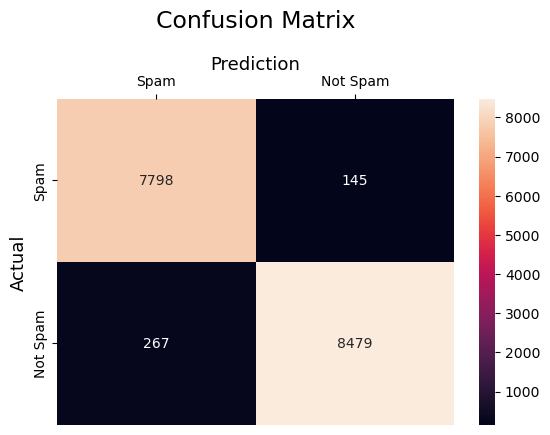

In [430]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Spam','Not Spam'],
            yticklabels=['Spam','Not Spam'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [431]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of model: ",accuracy)

Accuracy of model:  0.9753130804721672


In [432]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, mnb.predict_proba(vector_1)[:,1])

0.9939202364526188